#name:Diksha Maharjan

#Student id: 2408235

In [10]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/aicoursework/heart_attack_prediction_dataset.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#exploratory data analysis

Column Names: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']


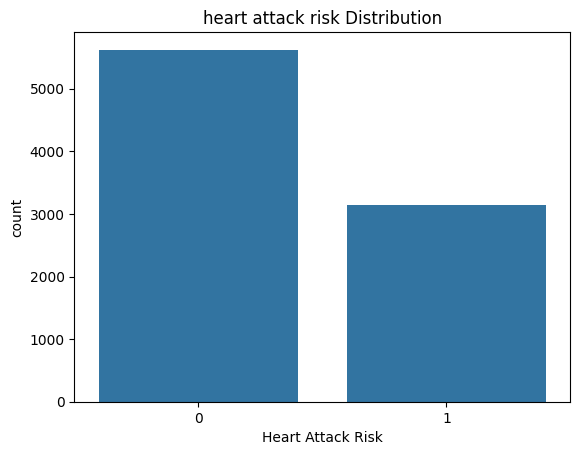

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# Print all column names
print("Column Names:", df.columns.tolist())

# Drop non-useful columns
df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'], errors='ignore', inplace=True)

# Split Blood Pressure into Systolic & Diastolic
if 'Blood Pressure' in df.columns:
    df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df.drop(columns=['Blood Pressure'], inplace=True)

# Convert 'Sex' to binary (Male = 1, Female = 0)
df["Sex"] = df["Sex"].map({"Male": 1, "Female": 0})
# Visualize numerical feature distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.countplot(x=df["Heart Attack Risk"])
plt.title("heart attack risk Distribution")
plt.show()



In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Encode categorical variable 'Diet' before defining X and y
le = LabelEncoder()
df["Diet"] = le.fit_transform(df["Diet"])

# Print encoding mapping
print("Diet Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])


# Define features and target variable
X = df.drop(columns=["Heart Attack Risk"])  # Ensure all features are numeric
y = df["Heart Attack Risk"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes to confirm
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Diet Encoding: {'Average': 0, 'Healthy': 1, 'Unhealthy': 2}
X_train shape: (7010, 22)
X_test shape: (1753, 22)
y_train shape: (7010,)
y_test shape: (1753,)


#logistic regression from scatch


In [13]:
import numpy as np

def sigmoid(z):
    """Apply the sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    """Train logistic regression using gradient descent."""
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(iterations):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
        db = (1 / n_samples) * np.sum(predictions - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_logistic_regression(X, weights, bias):
    """Make predictions using trained logistic regression model."""
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    return [1 if p > 0.5 else 0 for p in predictions]


# Assuming X_train_scaled and y_train are preprocessed training data
weights, bias = train_logistic_regression(X_train_scaled, y_train, learning_rate=0.1, iterations=1000)

# Predict on test set
y_pred = predict_logistic_regression(X_test_scaled, weights, bias)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_pred is your model's predicted output and y_test is the true output
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression (Scratch) Accuracy:", accuracy)

# Print the classification report (includes precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")

# Precision, Recall, and F1-Score for class 1 (as an example, you can specify class 0 or both)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Logistic Regression (Scratch) Accuracy: 0.6417569880205363

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753


Confusion Matrix:
[[1125    0]
 [ 628    0]]
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

#model1

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
#predict
y_pred_log_reg = log_reg.predict(X_test_scaled)

#accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)



Logistic Regression Accuracy: 0.49229891614375354


#model 2

In [15]:
from sklearn.ensemble import RandomForestClassifier
#train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
#predict
y_pred_rf = rf_model.predict(X_test_scaled)

#accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6366229321163719


In [16]:
from xgboost import XGBClassifier
#xgboost
# Train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=3)  # Adjust the scale_pos_weight to balance the classes
xgb_model.fit(X_train_scaled, y_train)

#predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)



XGBoost Accuracy: 0.522532800912721


In [27]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
#extra
print("\n\nXg boost Report:")
print("extra:",classification_report(y_test, y_pred_xgb))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1125
           1       0.34      0.46      0.39       628

    accuracy                           0.49      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.49      0.50      1753

Random Forest Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.39      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.52      0.50      0.41      1753
weighted avg       0.55      0.64      0.51      1753



Xg boost Report:
extra:               precision    recall  f1-score   support

           0       0.65      0.56      0.60      1125
           1       0.37      0.45      0.40       628

    accuracy                           0.52      1753
   macro avg       0.51      0.51      0.50      175

observation:which one is a better model?

Random Forest is better at identifying class 0 (high recall of 0.98 and high F1 score of 0.78), but it struggles significantly with class 1 (very low recall of 0.03 and F1 of 0.05).Logistic Regression has a more balanced performance across both classes, especially with respect to class 1. However, its overall performance is relatively weaker.If you care more about correctly identifying class 0 (high recall), Random Forest seems to be a better choice.If you need a more balanced model (with better recall for class 1), Logistic Regression may be the better option.

#hyper parameter tuning

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# Initialize RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Best model from GridSearch
best_rf = grid_search_rf.best_estimator_

# Predictions using the best model
y_pred_rf_best = best_rf.predict(X_test_scaled)

# Accuracy of the best model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Print best parameters and accuracy
print("Best hyper parameter for Random Forest:", grid_search_rf.best_params_)
print("Random Forest Best Accuracy:", accuracy_rf_best)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyper parameter for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Random Forest Best Accuracy: 0.6417569880205363


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define K-Fold Cross Validation (e.g., 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Logistic Regression
log_reg_params = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to try
    'max_iter': [500, 1000, 2000]  # Number of iterations
}

# Set up GridSearchCV for Logistic Regression with K-Fold
log_reg_grid = GridSearchCV(estimator=LogisticRegression(random_state=42, class_weight='balanced'),
                            param_grid=log_reg_params,
                            cv=kfold,
                            n_jobs=-1,
                            verbose=1)

# Fit the grid search to the data


grid_search = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for logistic regression:", grid_search.best_params_)




Best Hyperparameters for logistic regression: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}


In [22]:
from sklearn.metrics import classification_report

# Logistic Regression Classification Report
print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))




Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1125
           1       0.34      0.46      0.39       628

    accuracy                           0.49      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.49      0.50      1753



#feature selection


In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

selected_features = [X_train.columns[i] for i in feature_selector.get_support(indices=True)]
print("\nSelected Features:", selected_features)



Selected Features: ['Income', 'Sleep Hours Per Day', 'Diastolic BP']


#final optimized model


In [30]:
best_model=LogisticRegression(C=0.1, max_iter= 500, solver= 'lbfgs', class_weight='balanced')
best_model.fit(X_train_selected, y_train)
y_pred_best = best_model.predict(X_test_selected)

print("\n=== Final Optimized Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))



=== Final Optimized Model ===
Accuracy: 0.5042783799201369
              precision    recall  f1-score   support

           0       0.64      0.52      0.58      1125
           1       0.36      0.47      0.41       628

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.50      0.51      1753

